<a href="https://colab.research.google.com/github/Akshidha-Unni/Time-Series/blob/main/Metar_data_forecasting_using_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# METAR DATA FORECASTING USING TIME SERIES

### **PROBLEM STATEMENT**

To forecast the visibility in the airports using the METAR (Meteorological Terminal Air Report) data which contains information on the 
current weather conditions of the facility releasing the report. So We can forecast the visibility in the air for the upcoming hour using several independent attributes such 
as temperature, relative humidity, wind direction, wind intensity and so on.
The dataset is obtained from wunderground which is available on kaggle.

Dataset:https://www.kaggle.com/datasets/cabaki/knycmetars2016

### **ABOUT THE DATASET**
 **Time** : Timestamp of the observation

 **Temp.**: Air Temperature
 
 **Windchill** : Effect of cold wind on people
 
 **Heat Index** : Temperature combined with humidity.

 **Humidity**: Humidity in air 
 
 **Pressure**: Air Pressure 

 **Dew Point** : Temperature when dew forms.
 
 **Visibility** : Visibility in miles
 
 **Wind Dir** : Direction of the wind
 
 **Wind Speed** : Wind Speed in knots

 **Gust Speed** : Wind Gust in knots
 
 **Precip** : Precipitation 

 **Events** : Events such as rain
 
 **Condition** : Clear or overcast


### **1.Install and Import Libraries**

Importing necessary libraries

In [ ]:
#installing Facebook Prophet
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
  #importing required libraries
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### **2. Data Preprocessing**

**2.1 Read the data**

In [ ]:
#Loading the dataset
data = pd.read_csv("/content/KNYC_Metars.csv")
data.head()

,Time,Temp.,Windchill,Heat Index,Humidity,Pressure,Dew Point,Visibility,Wind Dir,Wind Speed,Gust Speed,Precip,Events,Conditions
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast


In [ ]:
#length of the dataset
len(data)

8787

In [ ]:
#copy data 
data_new=data

**2.2 Converting the datatype of columns**

In [ ]:
#checking the datatypes of the columns
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8787 entries, 0 to 8786
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        8787 non-null   object 
 1   Temp.       8787 non-null   float64
 2   Windchill   2295 non-null   float64
 3   Heat Index  815 non-null    float64
 4   Humidity    8787 non-null   float64
 5   Pressure    8556 non-null   float64
 6   Dew Point   8787 non-null   float64
 7   Visibility  8550 non-null   float64
 8   Wind Dir    8787 non-null   object 
 9   Wind Speed  8787 non-null   float64
 10  Gust Speed  8787 non-null   float64
 11  Precip      8787 non-null   float64
 12  Events      8787 non-null   object 
 13  Conditions  8787 non-null   object 
dtypes: float64(10), object(4)
memory usage: 961.2+ KB


In [ ]:
#converting the datetype to datetime
data_new['Time']=pd.to_datetime(data_new['Time'])
data_new.index=data_new['Time']

**2.3 Imputing Missing variables**

In [ ]:
data_new.isna().sum()

Time             0
Temp.            0
Windchill     6492
Heat Index    7972
Humidity         0
Pressure       231
Dew Point        0
Visibility     237
Wind Dir         0
Wind Speed       0
Gust Speed       0
Precip           0
Events           0
Conditions       0
dtype: int64

In [ ]:
data_new.columns

Index(['Time', 'Temp.', 'Windchill', 'Heat Index', 'Humidity', 'Pressure',
       'Dew Point', 'Visibility', 'Wind Dir', 'Wind Speed', 'Gust Speed',
       'Precip', 'Events', 'Conditions'],
      dtype='object')

In [ ]:
#imputing missing values
cols=['Windchill','Heat Index','Pressure','Visibility']
for i in cols:
  data_new[i]=data_new[i].fillna(value=(data_new[i].mean()))
data_new.isna().sum()

Time          0
Temp.         0
Windchill     0
Heat Index    0
Humidity      0
Pressure      0
Dew Point     0
Visibility    0
Wind Dir      0
Wind Speed    0
Gust Speed    0
Precip        0
Events        0
Conditions    0
dtype: int64

In [ ]:
data_new.head()

,Time,Temp.,Windchill,Heat Index,Humidity,Pressure,Dew Point,Visibility,Wind Dir,Wind Speed,Gust Speed,Precip,Events,Conditions
Time,,,,,,,,,,,,,,
2015-12-31 02:00:00,2015-12-31 02:00:00,7.8,7.100000,30.349325,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,None,Overcast
2015-12-31 03:00:00,2015-12-31 03:00:00,7.2,5.900000,30.349325,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,None,Overcast
2015-12-31 04:00:00,2015-12-31 04:00:00,7.2,-0.718911,30.349325,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,None,Overcast
2015-12-31 05:00:00,2015-12-31 05:00:00,7.2,5.900000,30.349325,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,None,Overcast
2015-12-31 06:00:00,2015-12-31 06:00:00,7.2,6.400000,30.349325,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,None,Overcast


### **3. EDA**

<ipython-input-12-45d6541978e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data_new.corr()


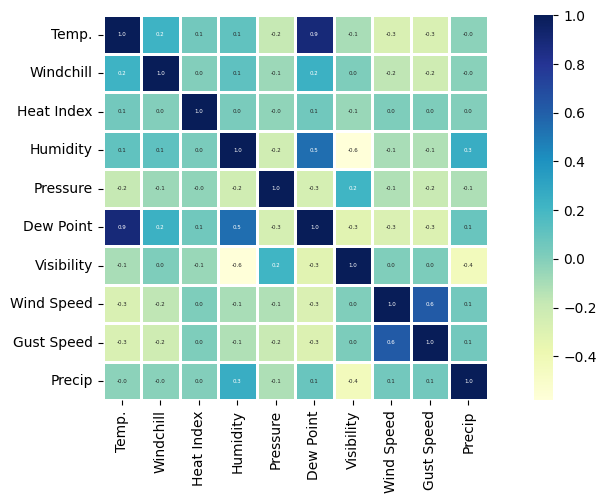

In [ ]:
#Understanding the correlation between the variables
corr=data_new.corr()
f,ax=plt.subplots(figsize=(12,5))
sns.heatmap(corr,annot=True,annot_kws = {'size':4} ,linewidths=1,fmt=".1f",ax=ax,cmap="YlGnBu",square=True)
plt.show()

<Axes: ylabel='Frequency'>

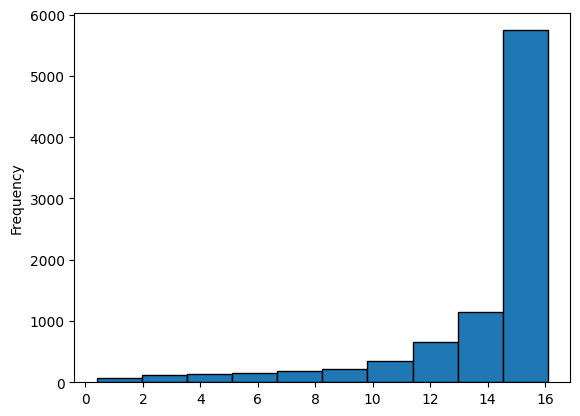

In [ ]:
#Understanding the Frequency distribution of dependent variable
data_new['Visibility'].plot.hist(edgecolor='k')

<Axes: ylabel='Density'>

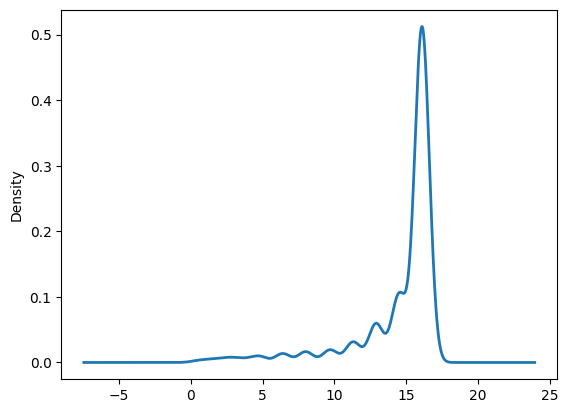

In [ ]:
data_new['Visibility'].plot(kind='kde',lw=2)

In [ ]:
#percentage distribution of the target variable
data_new['Visibility'].value_counts(normalize=True) * 100

16.100000    65.369296
14.500000    10.378969
12.900000     7.522476
11.300000     3.971776
14.474129     2.697166
9.700000      2.458177
8.000000      2.094003
6.400000      1.729828
4.800000      1.103903
4.000000      0.523501
3.200000      0.432457
2.800000      0.364174
2.400000      0.307272
2.000000      0.250370
1.600000      0.216229
1.200000      0.204848
0.400000      0.204848
0.800000      0.170707
Name: Visibility, dtype: float64

<Axes: xlabel='Time'>

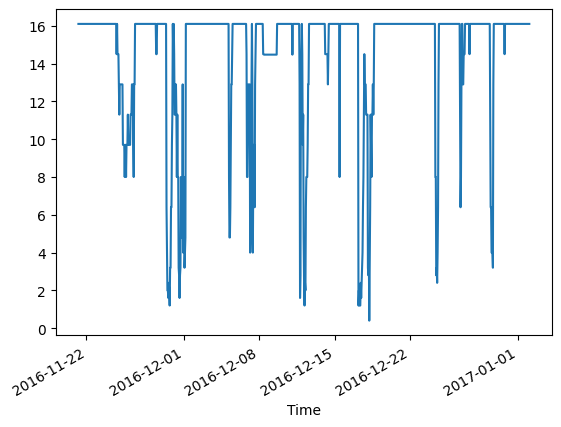

In [ ]:
#visualizing the target variable
data_new['Visibility'][-1000:].plot()

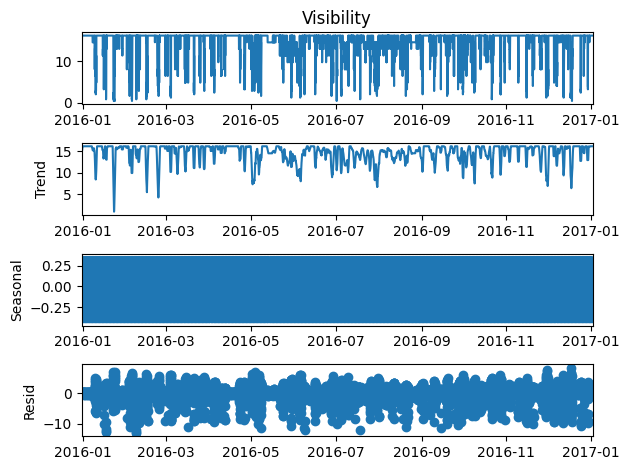

In [ ]:
#seasonal decompose plotting
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data_new['Visibility'], model='additive', period=24)
decomposition.plot();

In [ ]:
  #describing the target variable
data_new['Visibility'].describe()

count    8787.000000
mean       14.474129
std         3.133160
min         0.400000
25%        14.500000
50%        16.100000
75%        16.100000
max        16.100000
Name: Visibility, dtype: float64

### **4. Stationarity Test - Augmented Dickey Fuller Test**

In [ ]:
#ADF Test
from statsmodels.tsa.stattools import adfuller
series=data['Visibility'].values
series
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -15.881969
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


In [ ]:
#creating dataframes to store performance metric values
rmse_data= []
mse_data= []
mae_data=[]

## **5.Facebook Prophet Model**

### **5.1 Univariate Forecasting**

In [ ]:
#creating dataframe for fb prophet
df= data_new[['Time','Visibility']]
df.columns=['ds','y']

In [ ]:
#Splitting the dataset
#80% -Train , 20% -Test
train=df.iloc[:7030]
test=df.iloc[7030:]

In [ ]:
#fitting the model on train dataset
m=Prophet(growth="linear" )
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
#predicting the test data
forecast1=m.predict(test)


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
#setting the index
forecast1.index=forecast1['ds']
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,
2016-10-20 14:00:00,2016-10-20 14:00:00,14.607945,10.700960,18.525625,14.607945,14.607945,0.128984,0.128984,0.128984,-0.101882,-0.101882,-0.101882,0.230866,0.230866,0.230866,0.0,0.0,0.0,14.736929
2016-10-20 15:00:00,2016-10-20 15:00:00,14.608331,10.938375,18.472091,14.608331,14.608331,0.127314,0.127314,0.127314,-0.082428,-0.082428,-0.082428,0.209742,0.209742,0.209742,0.0,0.0,0.0,14.735645
2016-10-20 16:00:00,2016-10-20 16:00:00,14.608717,10.793413,18.623333,14.608717,14.608717,0.135718,0.135718,0.135718,-0.052078,-0.052078,-0.052078,0.187796,0.187796,0.187796,0.0,0.0,0.0,14.744435
2016-10-20 17:00:00,2016-10-20 17:00:00,14.609103,10.743875,18.745318,14.609103,14.609103,0.154063,0.154063,0.154063,-0.011032,-0.011032,-0.011032,0.165095,0.165095,0.165095,0.0,0.0,0.0,14.763166
2016-10-20 18:00:00,2016-10-20 18:00:00,14.609489,10.870553,18.663956,14.609489,14.609489,0.157086,0.157086,0.157086,0.015375,0.015375,0.015375,0.141712,0.141712,0.141712,0.0,0.0,0.0,14.766575


In [ ]:
#copy the predicted values onto a dataframe
predictions = forecast1.iloc[-1757:]['yhat']
predictions.head()

ds
2016-10-20 14:00:00    14.736929
2016-10-20 15:00:00    14.735645
2016-10-20 16:00:00    14.744435
2016-10-20 17:00:00    14.763166
2016-10-20 18:00:00    14.766575
Name: yhat, dtype: float64

In [ ]:
#estimating the performance of the model
rmse_data.append(rmse(predictions,test['y']))
rmse(predictions,test['y'])

3.2642054493702046

In [ ]:
#calculate the mse for the model
mse_data.append(mean_squared_error(predictions,test['y']))
mean_squared_error(predictions,test['y']) 

10.65503721569814

In [ ]:
#calculate the mae for the model
mae_data.append(mean_absolute_error(predictions,test['y']))
mean_absolute_error(predictions,test['y'])

1.9870726249014776

Text(0, 0.5, 'Visibility')

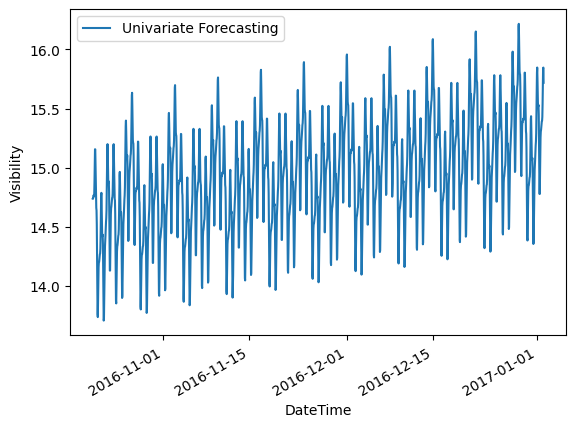

In [ ]:
#plotting the forecasted values
forecast1['yhat'].plot(label='Univariate Forecasting', legend=True)
plt.xlabel("DateTime")
plt.ylabel("Visibility")

### **5.2 Multivariate Forecasting**

In [ ]:
data.columns

Index(['Time', 'Temp.', 'Windchill', 'Heat Index', 'Humidity', 'Pressure',
       'Dew Point', 'Visibility', 'Wind Dir', 'Wind Speed', 'Gust Speed',
       'Precip', 'Events', 'Conditions'],
      dtype='object')

In [ ]:
#Extracting the required field from the dataset
data_mul = data_new[['Time','Temp.','Windchill','Heat Index','Pressure','Dew Point','Wind Speed','Gust Speed','Visibility','Precip']]
data_mul.columns=['ds','Temp.','Windchill','Heat Index','Pressure','Dew Point','Wind Speed','Gust Speed','y','Precip']

In [ ]:
#instantiate prophet
model=Prophet(growth='linear')
model.add_regressor('Temp.')
model.add_regressor('Windchill')
model.add_regressor('Heat Index')
model.add_regressor('Pressure')
model.add_regressor('Dew Point')
model.add_regressor('Wind Speed')
model.add_regressor('Gust Speed')
model.add_regressor('Precip')

In [ ]:
#Splitting the dataset
#80% -Train , 20% -Test
train_mul=data_mul.iloc[:7030]
test_mul=data_mul.iloc[7030:]

In [ ]:
#fitting the multivariate model
model.fit(train_mul)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
#predicting the test data
forecast_mul=model.predict(test_mul)
forecast_mul[['ds','yhat']].head()

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat
0,2016-10-20 14:00:00,13.913833
1,2016-10-20 15:00:00,13.451524
2,2016-10-20 16:00:00,13.180499
3,2016-10-20 17:00:00,13.154466
4,2016-10-20 18:00:00,12.951243


In [ ]:
#copying the predicted values on to a dataframe
predictions_m = forecast_mul.iloc[-1757:]['yhat']
predictions_m.head()

0    13.913833
1    13.451524
2    13.180499
3    13.154466
4    12.951243
Name: yhat, dtype: float64

Text(0, 0.5, 'Visibility')

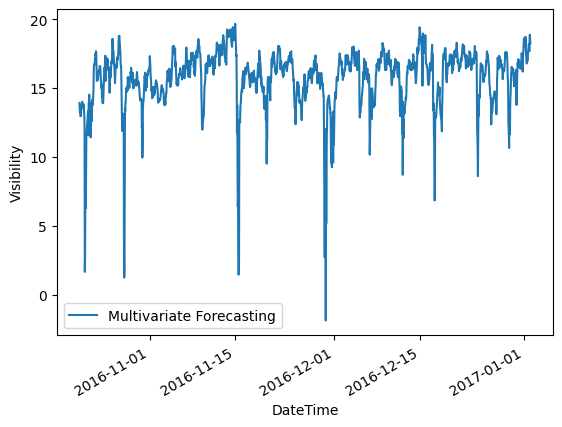

In [ ]:
#plotting the forecasted data 
forecast_mul.index=forecast_mul['ds']
forecast_mul['yhat'].plot(label = 'Multivariate Forecasting',legend=True)
plt.xlabel("DateTime")
plt.ylabel("Visibility")

In [ ]:
#calculate the rmse for the model
rmse_data.append(rmse(predictions_m,test_mul['y']))
rmse(predictions_m,test_mul['y'])

2.482170249896083

In [ ]:
#calculate the mse for the model
mse_data.append(mean_squared_error(predictions_m,test_mul['y']))
mean_squared_error(predictions_m,test_mul['y']) 

6.161169149469183

In [ ]:
#calculate the mae for the model
mae_data.append(mean_absolute_error(predictions_m,test_mul['y']))
mean_absolute_error(predictions_m,test_mul['y'])

1.559776162378958

In [ ]:
#standard deviation of the target variable
data['Visibility'].std()

3.133159727320667

Text(0, 0.5, 'Visibility')

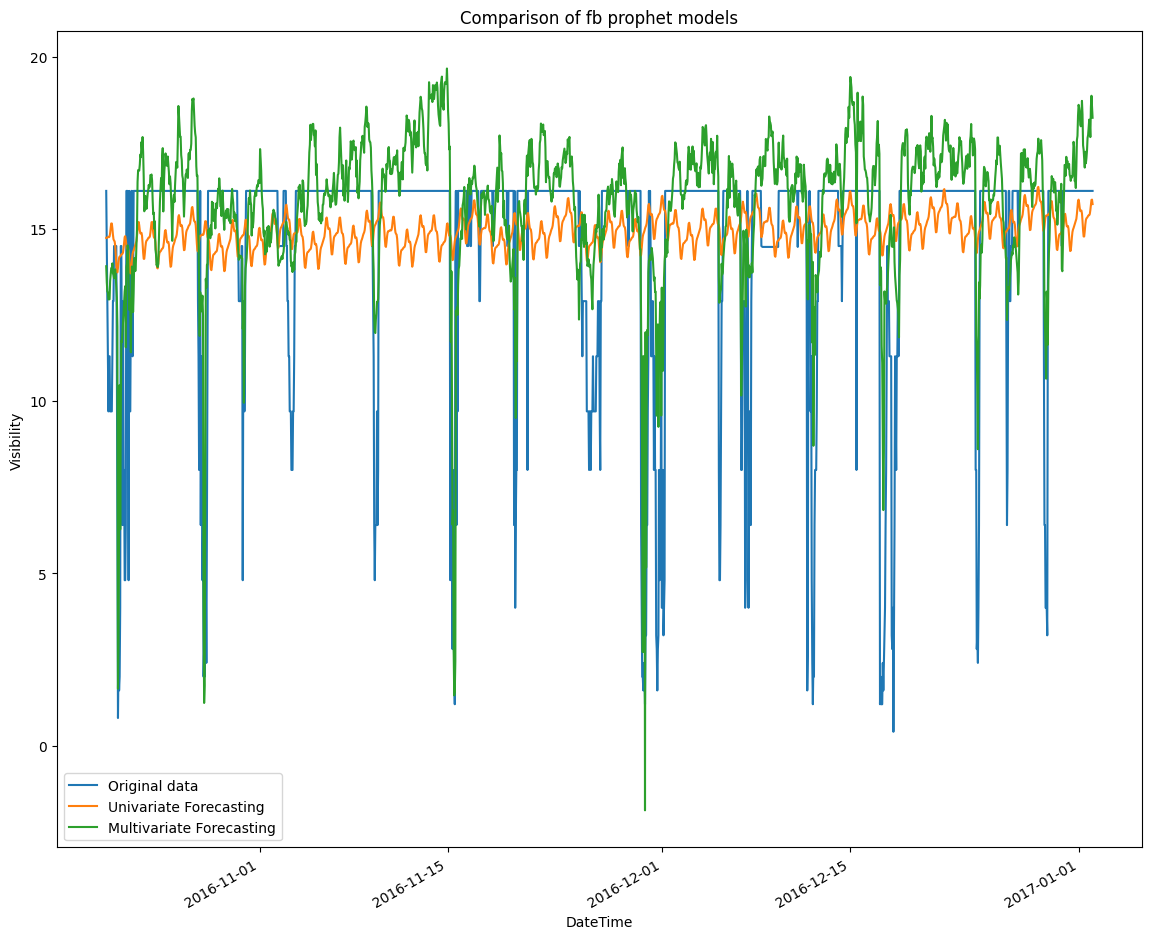

In [ ]:
#plotting the models
data_new['Visibility'][7030:].plot(figsize=(14,12), label ='Original data',legend=True,title='Comparison of fb prophet models')
forecast1['yhat'].plot(label ='Univariate Forecasting',legend=True)
forecast_mul['yhat'].plot(label ='Multivariate Forecasting',legend=True)
plt.xlabel("DateTime")
plt.ylabel("Visibility")


### **Forecasting Into the Future**

In [ ]:
#train the dataset on the entire dataset
m=Prophet(growth="linear" )
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
#predicting visibility for the next 24 hrs
future_3 =m.make_future_dataframe(periods=1000,freq='H')
forecast_3= m.predict(future_3)
forecast_3[['ds','yhat_lower','yhat_upper','yhat']].tail(24)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat_lower,yhat_upper,yhat
9763,2017-02-11 18:00:00,11.440516,19.193216,15.235643
9764,2017-02-11 19:00:00,11.325826,19.168035,15.282081
9765,2017-02-11 20:00:00,11.216659,19.234510,15.351323
9766,2017-02-11 21:00:00,11.770681,19.248345,15.474533
9767,2017-02-11 22:00:00,11.749222,19.406482,15.639128
9768,2017-02-11 23:00:00,11.797402,19.592058,15.781108
9769,2017-02-12 00:00:00,12.116753,19.838141,15.829624
9770,2017-02-12 01:00:00,11.668989,19.598384,15.768005
9771,2017-02-12 02:00:00,11.557142,19.450517,15.652762
9772,2017-02-12 03:00:00,11.501265,19.197598,15.567053


### **6.ARIMA MODEL**

In [ ]:
#installing required libraries
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.7 MB/s eta 0:00:00


In [ ]:
#importing necessary libraries
import statsmodels.api as sm
from pmdarima import auto_arima 

In [ ]:
#finding parameters for arima model
auto_arima(data_new['Visibility'],seasonal=False,m=24,trace=True).summary()

/usr/local/lib/python3.9/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (24) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=34638.476, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34356.635, Time=1.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=34304.281, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34636.479, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=13.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=34254.636, Time=2.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.88 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=34212.777, Time=1.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=16.58 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=34191.927, Time=1.82 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.12 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=34173.786, Time=3.41 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=23.19 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=34171.79

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8787
Model:               SARIMAX(0, 1, 5)   Log Likelihood              -17079.895
Date:                Thu, 20 Apr 2023   AIC                          34171.790
Time:                        05:28:34   BIC                          34214.276
Sample:                             0   HQIC                         34186.264
                               - 8787                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2156      0.005    -42.651      0.000      -0.226      -0.206
ma.L2         -0.0753      0.006    -13.039      0.000      -0.087      -0.064
ma.L3         -0.0750      0.006    -12.662      0.000      -0.087      -0.063
ma.L4         -0.0544      0.007     -8.128      0.000      -0.068      -0.041
ma.L5         -0.0518      0.006     -8.055      0.000      -0.064      -0.039
sigma2         2.8579      0.014    202.806      0.000       2.830       2.885
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):            128203.51
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.99
Prob(H) (two-sided):                  0.92   Kurtosis:                        21.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#splitting the dataset
train=data_new[:7030]
test=data_new[7030:]

In [ ]:
#fitting the arima model
model = sm.tsa.arima.ARIMA(train['Visibility'],order=(0,1,5))
results = model.fit()
results.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Visibility   No. Observations:                 7030
Model:                 ARIMA(0, 1, 5)   Log Likelihood              -13660.563
Date:                Thu, 20 Apr 2023   AIC                          27333.126
Time:                        05:28:35   BIC                          27374.273
Sample:                             0   HQIC                         27347.302
                               - 7030                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2284      0.006    -40.277      0.000      -0.239      -0.217
ma.L2         -0.0846      0.007    -12.159      0.000      -0.098      -0.071
ma.L3         -0.0734      0.007    -10.965      0.000      -0.087      -0.060
ma.L4         -0.0633      0.008     -8.125      0.000      -0.079      -0.048
ma.L5         -0.0509      0.008     -6.496      0.000      -0.066      -0.036
sigma2         2.8548      0.016    179.373      0.000       2.824       2.886
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             97321.24
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#predict the values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, typ='levels')
predictions.index=data_new.index[start:end+1]

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
#predicted values
predictions.head()

Time
2016-10-20 14:00:00    16.098339
2016-10-20 15:00:00    16.097453
2016-10-20 16:00:00    16.096920
2016-10-20 17:00:00    16.096636
2016-10-20 18:00:00    16.096525
Name: predicted_mean, dtype: float64

In [ ]:
#calculate the rmse for the model
rmse_data.append(rmse(predictions,test['Visibility']))
rmse(predictions,test['Visibility'])

3.5101443971198614

In [ ]:
#calculate the mse for the model
mse_data.append(mean_squared_error(predictions,test['Visibility']))
mean_squared_error(predictions,test['Visibility']) 

12.321113688631954

In [ ]:
#calculate the mae for the model
mae_data.append(mean_absolute_error(predictions,test['Visibility']))
mean_absolute_error(predictions,test['Visibility'])

1.3370458063745034

Text(0, 0.5, 'Visibility')

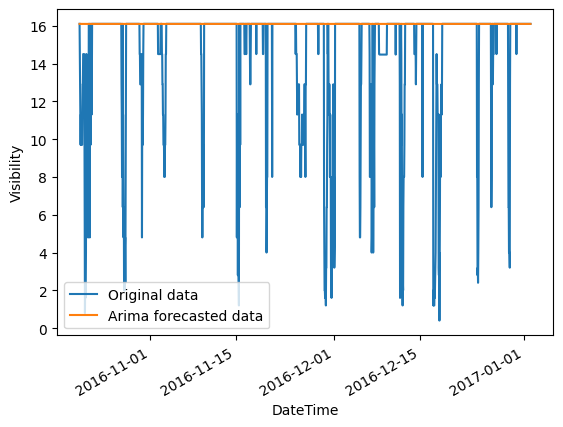

In [ ]:
#Plotting the original data against the forecasted values
test['Visibility'].plot(label='Original data',legend=True)
predictions.plot(label='Arima forecasted data',legend=True)
plt.xlabel("DateTime")
plt.ylabel("Visibility")

ARIMAX

In [ ]:
model_x=sm.tsa.arima.ARIMA(train['Visibility'],exog=train[['Temp.','Windchill','Heat Index','Pressure','Dew Point','Wind Speed','Gust Speed','Precip']],order=(0,1,5))
results_x= model_x.fit()
results_x.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Visibility   No. Observations:                 7030
Model:                 ARIMA(0, 1, 5)   Log Likelihood              -13347.506
Date:                Thu, 20 Apr 2023   AIC                          26723.012
Time:                        05:30:47   BIC                          26819.022
Sample:                             0   HQIC                         26756.089
                               - 7030                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp.          0.1460      0.014     10.366      0.000       0.118       0.174
Windchill      0.0174      0.017      1.022      0.307      -0.016       0.051
Heat Index    -0.0025      0.035     -0.073      0.942      -0.071       0.066
Pressure      -0.0301      0.018     -1.690      0.091      -0.065       0.005
Dew Point     -0.3009      0.014    -22.087      0.000      -0.328      -0.274
Wind Speed  9.771e-05      0.003      0.032      0.975      -0.006       0.006
Gust Speed    -0.0023      0.002     -1.162      0.245      -0.006       0.002
Precip        -0.4140      0.010    -41.467      0.000      -0.434      -0.394
ma.L1         -0.2865      0.007    -43.638      0.000      -0.299      -0.274
ma.L2         -0.0916      0.007    -12.420      0.000      -0.106      -0.077
ma.L3         -0.0940      0.007    -12.930      0.000      -0.108      -0.080
ma.L4         -0.0916      0.008    -11.549      0.000      -0.107      -0.076
ma.L5         -0.0848      0.008    -11.081      0.000      -0.100      -0.070
sigma2         2.6115      0.021    123.670      0.000       2.570       2.653
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):             72334.26
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#predicting the values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Temp.','Windchill','Heat Index','Pressure','Dew Point','Wind Speed','Gust Speed','Precip']]  
prediction_ax = results_x.predict(start=start, end=end, exog=exog_forecast)
prediction_ax.head()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


7030    15.944926
7031    15.561448
7032    15.250181
7033    15.164150
7034    14.931898
Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Visibility')

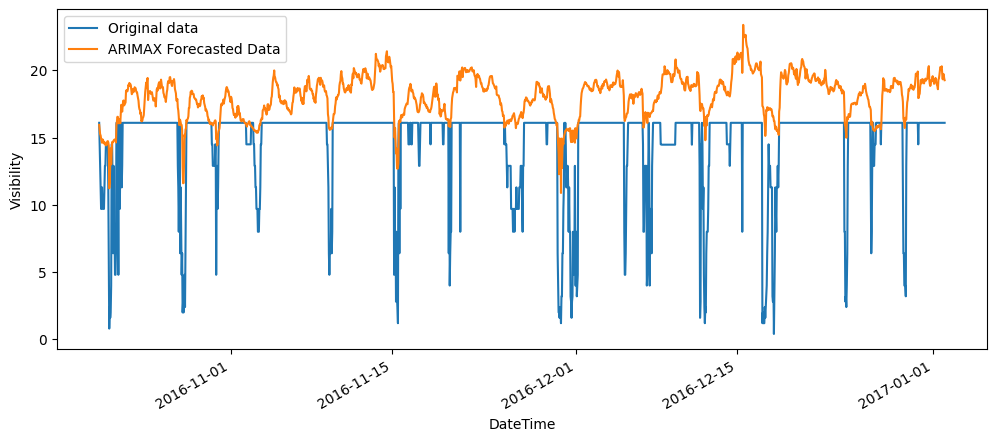

In [ ]:
#plotting the predicted values
test['Visibility'].plot(figsize=(12,5),label='Original data',legend=True)
prediction_ax.index=data_new.index[start:end+1]
prediction_ax.plot(label='ARIMAX Forecasted Data',legend=True)
plt.xlabel("DateTime")
plt.ylabel("Visibility")

In [ ]:
#calculate the rmse for the model
rmse_data.append(rmse(prediction_ax,test['Visibility']))
rmse(prediction_ax,test['Visibility'])

4.1980101640366705

In [ ]:
#calculate the mse for the model
mse_data.append(mean_squared_error(prediction_ax,test['Visibility']))
mean_squared_error(prediction_ax,test['Visibility']) 

17.623289337355196

In [ ]:
#calculate the mae for the model
mae_data.append(mean_absolute_error(prediction_ax,test['Visibility']))
mean_absolute_error(prediction_ax,test['Visibility'])

3.3047442572046806

### **RESULTS**

In [ ]:
#comparing the performances of univariate and multivaraite forecasting
Score=[]
columns=['Univariate FB','Multivariate FB','ARIMA','ARIMAX']
index=['RMSE','MSE','MAE']
Score.append(rmse_data)
Score.append(mse_data)
Score.append(mae_data)
Score_df=pd.DataFrame(Score,columns=columns,index=index)
Score_df

,Univariate FB,Multivariate FB,ARIMA,ARIMAX
RMSE,3.264205,2.482170,3.510144,4.198010
MSE,10.655037,6.161169,12.321114,17.623289
MAE,1.987073,1.559776,1.337046,3.304744
